# Project 4. KNN, Logistic Regression & Classification Model Evaluation
Group 6: Elizabeth Cardosa, Jaydeep Radadia, Koushik Ajjuguttu, Stephanie Zhang

Contributions: Each group member attempted all the problems, then we worked together as a group to determine the best solutions and resolve any questions.
 
Assigned on Apr 11, 2022; Due on May 2, 2022

In this project, you are using K-Nearest Neighbor as well as Logistic Regression Models to predict if a patient has heart disease.
Project Description and Objective
You will be given a dataset on heart disease diagnosis. Your goal is to build a KNN and logistic regression model to predict the likelihood of heart disease as well as the verdict. 

***For this project you CANNOT use existing packages to calibrate the classification evaluation metrics, confusion matrix or ROC curve. You must build your own functions for those from scratch, while you can use the sklearn to help you compute the AU(RO)C. ***

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import MinMaxScaler 
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, precision_score, f1_score

# Input
You are sourcing your data from `UCI Machine Learning Repository`. https://archive-beta.ics.uci.edu/ml/datasets/heart+disease

Please read the description carefully, and you are expected to use cleveland processed data. Since this is a classification exercise, please binarize the target, where 0 means no condition, and not 0 means heart condition. 


***From the Source:***

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0). The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

 * age: age in years 

 * sex: sex (1 = male; 0 = female) 

 * cp: chest pain type -- Value 1: typical angina -- Value 2: 
atypical angina -- Value 3: non-anginal pain -- Value 4: asymptomatic 

 * trestbps: resting blood pressure (in mm Hg on admission to the hospital) 

 * chol: serum cholestoral in mg/dl 

 * fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)   

 * restecg: resting electrocardiographic results -- Value 0: normal -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 

 * thalach: maximum heart rate achieved 

 * exang: exercise induced angina (1 = yes; 0 = no) 

 * oldpeak = ST depression induced by exercise relative to rest 

 * slope: the slope of the peak exercise ST segment -- Value 1: upsloping -- Value 2: flat -- Value 3: downsloping 

 * ca: number of major vessels (0-3) colored by flourosopy 

 * thal: 3 = normal; 6 = fixed defect; 7 = reversable defect 

 * num: diagnosis of heart disease (angiographic disease status) -- Value 0: < 50% diameter narrowing -- Value 1: > 50% diameter narrowing 

# Output


## 1) Describe and Understand the data. (10pts)
* Read through the data description, properly label your data so that others can also understand the data you are working with. 
* Train-test split, stratified by the target. Please choose 80% / 20% allocation. 


### Read in the data

In [ ]:
cols = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']

In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data', 
                 header=None, names=cols)

In [ ]:
# Update to more intuitive column names
df.columns = ['Age', 'Sex', 'Chest_pain_type', 'Rest_bp', 'Cholestrol',
           'Blood_Sugar', 'Rest_ECG', 'Max_Heart_Rate',
           'Exe_ind_anigma', 'Exe_ind_dep', 'Slo',
           'Major_blood_vessels', 'Thal', 'Diag_Res']

In [ ]:
df

,Age,Sex,Chest_pain_type,Rest_bp,Cholestrol,Blood_Sugar,Rest_ECG,Max_Heart_Rate,Exe_ind_anigma,Exe_ind_dep,Slo,Major_blood_vessels,Thal,Diag_Res
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


### Explore Data 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  303 non-null    float64
 1   Sex                  303 non-null    float64
 2   Chest_pain_type      303 non-null    float64
 3   Rest_bp              303 non-null    float64
 4   Cholestrol           303 non-null    float64
 5   Blood_Sugar          303 non-null    float64
 6   Rest_ECG             303 non-null    float64
 7   Max_Heart_Rate       303 non-null    float64
 8   Exe_ind_anigma       303 non-null    float64
 9   Exe_ind_dep          303 non-null    float64
 10  Slo                  303 non-null    float64
 11  Major_blood_vessels  303 non-null    object 
 12  Thal                 303 non-null    object 
 13  Diag_Res             303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [ ]:
df['Major_blood_vessels'].value_counts()

0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: Major_blood_vessels, dtype: int64

In [ ]:
# Replace '?' with NaN and make dtype float
df['Major_blood_vessels'].replace('?', np.nan, inplace=True)
df['Major_blood_vessels'] = df['Major_blood_vessels'].astype('float')

In [ ]:
df['Thal'].value_counts()

3.0    166
7.0    117
6.0     18
?        2
Name: Thal, dtype: int64

In [ ]:
# Replace '?' with NaN and make dtype float
df['Thal'].replace('?', np.nan, inplace=True)
df['Thal'] = df['Thal'].astype('float')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  303 non-null    float64
 1   Sex                  303 non-null    float64
 2   Chest_pain_type      303 non-null    float64
 3   Rest_bp              303 non-null    float64
 4   Cholestrol           303 non-null    float64
 5   Blood_Sugar          303 non-null    float64
 6   Rest_ECG             303 non-null    float64
 7   Max_Heart_Rate       303 non-null    float64
 8   Exe_ind_anigma       303 non-null    float64
 9   Exe_ind_dep          303 non-null    float64
 10  Slo                  303 non-null    float64
 11  Major_blood_vessels  299 non-null    float64
 12  Thal                 301 non-null    float64
 13  Diag_Res             303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,303.0,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
Sex,303.0,0.679868,0.467299,0.0,0.0,1.0,1.0,1.0
Chest_pain_type,303.0,3.158416,0.960126,1.0,3.0,3.0,4.0,4.0
Rest_bp,303.0,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
Cholestrol,303.0,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0
Blood_Sugar,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
Rest_ECG,303.0,0.990099,0.994971,0.0,0.0,1.0,2.0,2.0
Max_Heart_Rate,303.0,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
Exe_ind_anigma,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
Exe_ind_dep,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


### Train-test split, 80%/20% stratified by the target 

In [ ]:
numeric_columns = ['Age', 'Sex', 'Chest_pain_type', 'Rest_bp', 'Cholestrol', 'Blood_Sugar',
       'Rest_ECG', 'Max_Heart_Rate', 'Exe_ind_anigma', 'Exe_ind_dep', 'Slo',
       'Major_blood_vessels', 'Thal']
target = 'Diag_Res'

In [ ]:
df['Diag_Res'].value_counts()

0    164
1     55
2     36
3     35
4     13
Name: Diag_Res, dtype: int64

Binarize the target

In [ ]:
df.loc[df['Diag_Res'] >= 1, 'Diag_Res'] = 1

In [ ]:
df['Diag_Res'].value_counts()

0    164
1    139
Name: Diag_Res, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=target), df[target], stratify=df[target], test_size=0.2)

## 2) Visualization step. (10pts) 
* Use any method that you deem as appropriate to find out the most 2 relevant features to the target. 
* Apply a 2-d scatter plot of the features with a heat map of the target overlay. 

In [ ]:
# https://scikit-learn.org/stable/modules/feature_selection.html

from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import chi2

In [ ]:
X_train_proc = SimpleImputer(strategy='median').fit_transform(X_train[numeric_columns])
X_train_proc = pd.DataFrame(X_train_proc, columns=numeric_columns)

In [ ]:
kb = SelectKBest(mutual_info_classif, k=2)

In [ ]:
X_new = kb.fit_transform(X_train_proc, y_train)

In [ ]:
kb.get_feature_names_out()

array(['Sex', 'Thal'], dtype=object)

https://python-graph-gallery.com/43-use-categorical-variable-to-color-scatterplot-seaborn

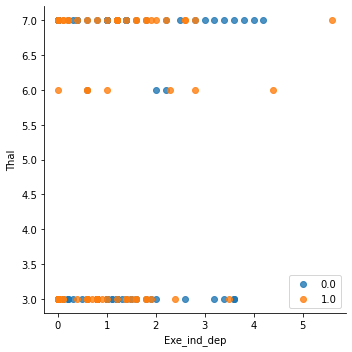

In [ ]:
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x='Exe_ind_dep', y='Thal', data=pd.concat([X_train_proc,y_train], axis=1), fit_reg=False, hue=target, legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')

plt.show()

## 3) No feature engineering or regularization needed. (20pts)
a) Initiate a KNN model, and apply 3-fold CVs and search for the best K. 

b) Also fit a logistic regression model. 


### KNN w/ 3-fold CV to find the best K

In [ ]:
knn_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                           ('scale',MinMaxScaler()),
                           ('knn', KNeighborsClassifier())])

Working for the hospital you would want you minimize false negatives, so uses recall as the scorer to pick the best number n neighbors.

In [ ]:
knn_grid = GridSearchCV(knn_pipe, param_grid={'knn__n_neighbors':range(1, int(np.sqrt(len(df))) + 1)},
                        scoring = 'recall', 
                        return_train_score=True, 
                        cv=KFold(3)) 

knn_grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('impute',
                                        SimpleImputer(strategy='median')),
                                       ('scale', MinMaxScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': range(1, 18)},
             return_train_score=True, scoring='recall')

In [ ]:
print("Best parameter:", knn_grid.best_params_)

Best parameter: {'knn__n_neighbors': 9}


In [ ]:
print("Best Recall Score:", knn_grid.best_score_)

Best Recall Score: 0.7968766613503456


In [ ]:
# Choose the best estimator to be the final model 
knn = knn_grid.best_estimator_

### Logistic Regression

In [ ]:
log_reg_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                               ('logistic_regression', LogisticRegression(penalty='none', max_iter=10000))])

log_reg_pipe.fit(X_train, y_train)

Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                ('logistic_regression',
                 LogisticRegression(max_iter=10000, penalty='none'))])

## 4) Model Evaluation. (30 pts)
For prediction, you can only use .predict_proba. DO NOT use .predict. 





### a) Build a confusion matrix (CM) function that takes input of the model and the probability cutoff. The function returns the confusion matrix, and also prints out recall, precision and f1 score. 
* Print out the CM for cutoff of 0.3 and 0.7, for both KNN and logistic regression. Talk about what you observe.

Applied to the confusion matrix, the cutoff is also known as the threshold. The matrix uses this value to assign each prediction to a binary classification. 

Precision measures: out of the predicted true, how many were actually true.

Precision = true positive/ (true positive + false positive)  *false positive aka type 1 error

Increasing precision means increasing type II error.

Recall measures: out of the actual true, how many were predicted true.

Recall = true positive/(true positive + false negative) *false negatives aka type II error

Good for when you need to capture all true positives, even if that means increasing false positives (false alarms), etc. good for cancer detection. 

Increasing recall means increasing type I error.

Thus, increasing the threshold will increase precision while decreasing recall and vice versa. 

A happy compromise between the two is the harmonic mean, called the F1 Score.

F1 = 2[(Precision*Recall)/(Precision + Recall)] 

The harmonic mean is used to showcase the effects of outliers.


In [ ]:
def con_mat(ground_truth, predicted_prob, cut_off):
  df = ground_truth.to_frame()
  df['predictions'] = np.where(predicted_prob[:,1] >= cut_off, 1, 0)
  grps = df.groupby(['predictions', 'Diag_Res'])['Diag_Res'].count()

  return grps

In [ ]:
def precision(ground_truth, predicted_prob, cut_off):
  df = ground_truth.to_frame()
  df['predictions'] = np.where(predicted_prob[:,1] >= cut_off, 1, 0)
  tp = df.loc[(df['predictions'] == 1) & (df['Diag_Res'] == 1), 'predictions'].count()
  fp = df.loc[(df['predictions'] == 1) & (df['Diag_Res'] == 0), 'predictions'].count()
  return tp / (tp + fp)

In [ ]:
def recall(ground_truth, predicted_prob, cut_off):
  df = ground_truth.to_frame()
  df['predictions'] = np.where(predicted_prob[:,1] >= cut_off, 1, 0)
  tp = df.loc[(df['predictions'] == 1) & (df['Diag_Res'] == 1), 'predictions'].count()
  fn = df.loc[(df['predictions'] == 0) & (df['Diag_Res'] == 1), 'predictions'].count()
  return tp / (tp + fn)

In [ ]:
def f1(ground_truth, predicted_prob, cut_off):
  df = ground_truth.to_frame()
  df['predictions'] = np.where(predicted_prob[:,1] >= cut_off, 1, 0)
  tp = df.loc[(df['predictions'] == 1) & (df['Diag_Res'] == 1), 'predictions'].count()
  fp = df.loc[(df['predictions'] == 1) & (df['Diag_Res'] == 0), 'predictions'].count()
  fn = df.loc[(df['predictions'] == 0) & (df['Diag_Res'] == 1), 'predictions'].count()
  return tp / (tp + 0.5 * (fp + fn))

In [ ]:
def specificity(ground_truth, predicted_prob, cut_off):
  df = ground_truth.to_frame()
  df['predictions'] = np.where(predicted_prob[:,1] >= cut_off, 1, 0)
  fp = df.loc[(df['predictions'] == 1) & (df['Diag_Res'] == 0), 'predictions'].count()
  tn = df.loc[(df['predictions'] == 0) & (df['Diag_Res'] == 0), 'predictions'].count()
  return tn / (fp + tn)

#### KNN Model Performance on Testing Data (confusion matrix, recall, precision and f1 score)

In [ ]:
knn_probs = knn.predict_proba(X_test)

##### 0.3 Cutoff

In [ ]:
con_mat(y_test, knn_probs, .3)

predictions  Diag_Res
0            0           19
             1            2
1            0           14
             1           26
Name: Diag_Res, dtype: int64

In [ ]:
print("Cutoff 0.3")
print("UDF KNN Precision:", precision(y_test, knn_probs, .3))
print("UDF KNN Recall:", recall(y_test, knn_probs, .3))
print("UDF KNN F1:", f1(y_test, knn_probs, .3))

Cutoff 0.3
UDF KNN Precision: 0.65
UDF KNN Recall: 0.9285714285714286
UDF KNN F1: 0.7647058823529411


##### 0.7 Cutoff

In [ ]:
con_mat(y_test, knn_probs, .7)

predictions  Diag_Res
0            0           31
             1            8
1            0            2
             1           20
Name: Diag_Res, dtype: int64

In [ ]:
print("Cutoff 0.7")
print("UDF KNN Precision:", precision(y_test, knn_probs, .7))
print("UDF KNN Recall:", recall(y_test, knn_probs, .7))
print("UDF KNN F1:", f1(y_test, knn_probs, .7))

Cutoff 0.7
UDF KNN Precision: 0.9090909090909091
UDF KNN Recall: 0.7142857142857143
UDF KNN F1: 0.8


#### Logistic Regression Performance on Testing Data (confusion matrix, recall, precision and f1 score)

In [ ]:
log_probs = log_reg_pipe.predict_proba(X_test)

##### Logistic Regression w/ 0.3 Cutoff

In [ ]:
con_mat(y_test, log_probs, .3)

predictions  Diag_Res
0            0           24
             1            4
1            0            9
             1           24
Name: Diag_Res, dtype: int64

In [ ]:
print("Cutoff 0.3")
print("UDF Logistic Regression Precision:", precision(y_test, log_probs, .3))
print("UDF Logistic Regression Recall:", recall(y_test, log_probs, .3))
print("UDF Logistic Regression F1:", f1(y_test, log_probs, .3))

Cutoff 0.3
UDF Logistic Regression Precision: 0.7272727272727273
UDF Logistic Regression Recall: 0.8571428571428571
UDF Logistic Regression F1: 0.7868852459016393


##### Logistic Regression w/ 0.7 Cutoff

In [ ]:
con_mat(y_test, log_probs, .7)

predictions  Diag_Res
0            0           30
             1            7
1            0            3
             1           21
Name: Diag_Res, dtype: int64

In [ ]:
print("Cutoff 0.7")
print("UDF Logistic Regression Precision:", precision(y_test, log_probs, .7))
print("UDF Logistic Regression Recall:", recall(y_test, log_probs, .7))
print("UDF Logistic Regression F1:", f1(y_test, log_probs, .7))

Cutoff 0.7
UDF Logistic Regression Precision: 0.875
UDF Logistic Regression Recall: 0.75
UDF Logistic Regression F1: 0.8076923076923077


## Observations*: 
1. Overall, the logistic regression is better at classifying true positives and true negatives than the KNN i.e. logistic regression has greater accuracy.
2. The accuracy of both the models improve on increasing the probability cutoff.
3. The logistic regression has better performance over the KNN in F1 score metric regardless of the probability cutoff.
4. Increasing the probability cutoff leads to a decrease in the recall of both the models. 
5. The precision increases on increasing the probability cutoff, thereby justifying the precision-recall tradeoff. 

\* Since the model has high variance, the results may differ on re-running the notebook.

### b) Use np.linspace(0.1,0.9,10) for the probability cutoff to build the ROC curves for KNN and logistic regression.
* Talk about your observations. 

In [ ]:
tpr_log = []
fpr_log = []

tpr_knn = []
fpr_knn = []

cut_offs = np.linspace(0.1, 0.9, 10)

for i in range(len(cut_offs)):
  tpr_log.append(recall(y_test, log_probs, cut_offs[i]))
  fpr_log.append(1-specificity(y_test, log_probs, cut_offs[i]))

  tpr_knn.append(recall(y_test, knn_probs, cut_offs[i]))
  fpr_knn.append(1-specificity(y_test, knn_probs, cut_offs[i]))

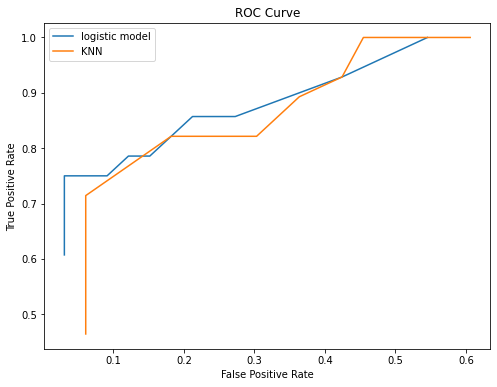

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label='logistic model')
plt.plot(fpr_knn, tpr_knn, label='KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC Curve');

## Observations*: 
1. The models are above the $45^{o}$ line implying that they perform better than a random guess.
2. Among the two, the logistic model performs slightly better than KNN.


\* Since the model has high variance, the results may differ on re-running the notebook.

## 5) Real life decision. (30 pts)
For each of the following cases, search for the optimal model and optimal probability cutoff; or suggest the hospital to stop the program. 

Your analysis should only utilize part 4) and numbers provided in the cases above.


**bold text**

expected_profit = precision * $profit$ + fpr * $loss_{1}$ + fnr * $loss_{2}$


$profit$ = profit associated with correctly identifying a patient as being a heart patient. Here, it is $20k.


$loss_{1}$ = loss associated with mistakenly identifying a patient as positive. Here, it is $20k.

$loss_{2}$ = loss associated with NOT being able to identify a patient positive, when in fact he/she is a heart patient. Here, it is $100k.

precision = It is the ratio of positives correctly identified as positives.


fpr = 1 - specificty\
     False positive rate is the ratio of the negative instances that were incorrectly classified as positive.


fnr = 1 - recall\
False negative rate, also called the miss rate, is the ratio of the positive instances incorrectly identified as negative.




In [ ]:
def exp_pro(tp_profit, fp_loss, fn_loss, precision, recall, specificity):

  exp_value = tp_profit * precision - fp_loss * (1- specificity) - fn_loss * (1 - recall)

  return exp_value

### Case 1. Correctly identifying a patient earns the hospital 20k. Sending a false positive alarm costs the hospital $20k, while not sending correct verdicts to patients with heart conditions hurts the hospital's long term profitability of 100k. 

#### Logistic Regression Model

In [ ]:
exp_prof = {}
cut_offs = np.linspace(0.1, 0.9, 10)

for i in range(len(cut_offs)):
  pre = precision(y_test, log_probs, cut_offs[i])
  rec = recall(y_test, log_probs, cut_offs[i])
  spec = specificity(y_test, log_probs, cut_offs[i])  

  exp_prof[cut_offs[i]] = exp_pro(20, 20, 100, pre, rec, spec)

In [ ]:
exp_prof

{0.1: 1.2648221343873534,
 0.18888888888888888: -2.627705627705624,
 0.2777777777777778: -5.1948051948051965,
 0.3666666666666667: -4.134199134199138,
 0.4555555555555556: -3.0442675603965963,
 0.5444444444444445: -8.162578162578166,
 0.6333333333333333: -6.929736929736931,
 0.7222222222222222: -9.318181818181818,
 0.8111111111111111: -6.515151515151512,
 0.9: -21.002886002886008}

#### KNN Model 

In [ ]:
exp_prof = {}
cut_offs = np.linspace(0.1, 0.9, 10)

for i in range(len(cut_offs)):
  pre = precision(y_test, knn_probs, cut_offs[i])
  rec = recall(y_test, knn_probs, cut_offs[i])  
  spec = specificity(y_test, log_probs, cut_offs[i])  

  exp_prof[cut_offs[i]] = exp_pro(20, 20, 100, pre, rec, spec)

In [ ]:
exp_prof

{0.1: 0.7575757575757596,
 0.18888888888888888: 4.538407329105006,
 0.2777777777777778: 0.4025974025974062,
 0.3666666666666667: -2.0492570492570454,
 0.4555555555555556: -8.160173160173162,
 0.5444444444444445: -6.948051948051949,
 0.6333333333333333: -4.419316315868043,
 0.7222222222222222: -12.20779220779221,
 0.8111111111111111: -25.685425685425688,
 0.9: -36.844155844155836}


Here, the hospital expects to make money under stringent probability cut offs according to the Logistic Regression model, while the KNN is more generous in the allowance of the probability cutoff.

### Case 2. Ceteris paribus to Case 1, what if the lawmaker increased the penalty of false positive alarm to 200k?

#### Logistic Regression Model

In [ ]:
exp_prof = {}
cut_offs = np.linspace(0.1, 0.9, 10)

for i in range(len(cut_offs)):
  pre = precision(y_test, log_probs, cut_offs[i])
  rec = recall(y_test, log_probs, cut_offs[i])  
  spec = specificity(y_test, log_probs, cut_offs[i])  

  exp_prof[cut_offs[i]] = exp_pro(20, 20, 200, pre, rec, spec)

In [ ]:
exp_prof

{0.1: 1.2648221343873534,
 0.18888888888888888: -9.770562770562764,
 0.2777777777777778: -19.480519480519487,
 0.3666666666666667: -18.419913419913428,
 0.4555555555555556: -17.329981846110886,
 0.5444444444444445: -29.591149591149595,
 0.6333333333333333: -28.358308358308363,
 0.7222222222222222: -34.31818181818182,
 0.8111111111111111: -31.515151515151512,
 0.9: -60.2886002886003}

#### KNN Model

In [ ]:
exp_prof = {}
cut_offs = np.linspace(0.1, 0.9, 10)

for i in range(len(cut_offs)):
  pre = precision(y_test, knn_probs, cut_offs[i])
  rec = recall(y_test, knn_probs, cut_offs[i])  
  spec = specificity(y_test, log_probs, cut_offs[i])  

  exp_prof[cut_offs[i]] = exp_pro(20, 20, 200, pre, rec, spec)

In [ ]:
exp_prof

{0.1: 0.7575757575757596,
 0.18888888888888888: 4.538407329105006,
 0.2777777777777778: -6.7402597402597335,
 0.3666666666666667: -12.763542763542755,
 0.4555555555555556: -26.017316017316023,
 0.5444444444444445: -24.80519480519481,
 0.6333333333333333: -22.276459173010906,
 0.7222222222222222: -40.77922077922078,
 0.8111111111111111: -68.54256854256855,
 0.9: -90.4155844155844}

Even if the lawmakers raise the penalty, hospital can expect to make money. \
The story is similar to the above case, as logistic regression is more conservative in choosing the probability cutoffs. 